<Figure size 800x600 with 0 Axes>

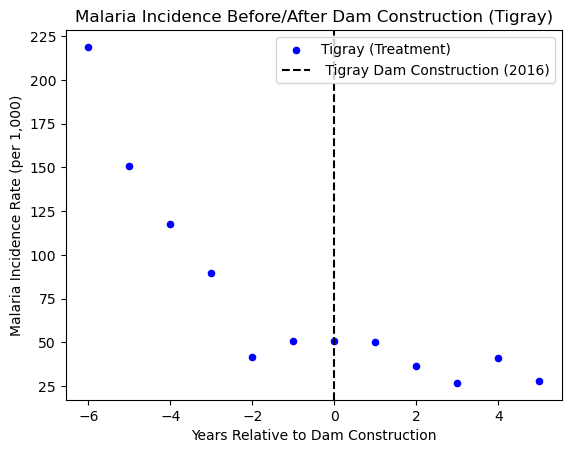

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.902
Model:                            WLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     24.44
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000221
Time:                        19:58:04   Log-Likelihood:                -51.555
No. Observations:                  12   AIC:                             111.1
Df Residuals:                       8   BIC:                             113.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         19.3463     14.827      1.

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 800x600 with 0 Axes>

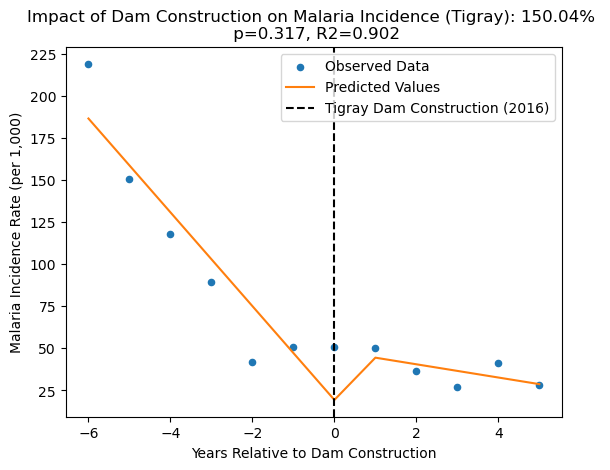

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# PART 1: Load and clean data
file_path = '/Users/MinxuanLuo/Desktop/filtered_data11.csv'
df = pd.read_csv(file_path)

# Filter data for Tigray
df = df[df['Name'] == 'Tigray']

# Check for missing values and data integrity
if df.empty:
    raise ValueError("Dataframe is empty after filtering for Tigray.")
if df['Year'].isnull().any() or df['Value'].isnull().any():
    raise ValueError("Year or Value column contains missing values.")
if df['Year'].nunique() < 2:
    raise ValueError("Year column has less than 2 unique values, insufficient for RDD.")

# Create relative year column
df["Year"] -= 2016  # Center years around 2016 (breakpoint)

# PART 2: Data visualization
plt.figure(figsize=(8, 6))
df.plot.scatter(x="Year", y="Value", color="blue", label="Tigray (Treatment)")
plt.axvline(0, color="black", linestyle="--", label="Tigray Dam Construction (2016)")
plt.title("Malaria Incidence Before/After Dam Construction (Tigray)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.show()

# PART 3: Build RDD model
# Create threshold variable for Tigray
rdd_df = df.assign(threshold=(df["Year"] > 0).astype(int))

# Fit regression model
try:
    model = smf.wls("Value ~ Year * threshold", rdd_df).fit()
except ValueError as e:
    print("Model fitting failed: ", e)
    raise

# Output model results
print(model.summary())

# PART 4: Calculate Average Treatment Effect (ATE)
ate_pct = 100 * ((model.params["threshold"] + model.params["Intercept"]) / model.params["Intercept"] - 1)
print("Dam construction changes the malaria incidence rate by {}%".format(np.round(ate_pct, 2)))

# PART 5: Visualize model fit
plt.figure(figsize=(8, 6))
ax = df.plot.scatter(x="Year", y="Value", color="C0", label="Observed Data")
df.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label="Predicted Values")
plt.axvline(0, color="black", linestyle="--", label="Tigray Dam Construction (2016)")
plt.title(f"Impact of Dam Construction on Malaria Incidence (Tigray): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

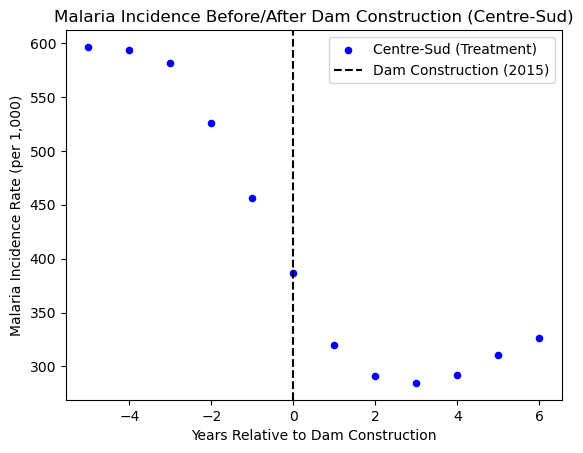

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.971
Model:                            WLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     88.38
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           1.79e-06
Time:                        20:03:18   Log-Likelihood:                -53.611
No. Observations:                  12   AIC:                             115.2
Df Residuals:                       8   BIC:                             117.2
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        414.8354     18.691     22.

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 800x600 with 0 Axes>

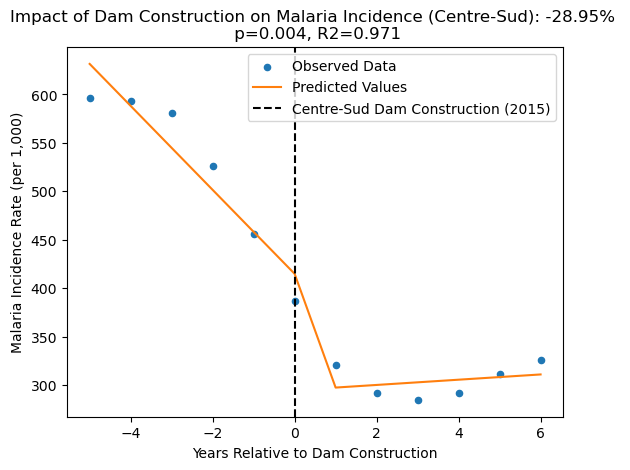

In [33]:
file_path = '/Users/MinxuanLuo/Desktop/filtered_data22.csv'
df = pd.read_csv(file_path)

df = df[df['Name'] == 'Centre-Sud']

if df.empty:
    raise ValueError("Dataframe is empty after filtering for Centre-Sud.")
if df['Year'].isnull().any() or df['Value'].isnull().any():
    raise ValueError("Year or Value column contains missing values.")
if df['Year'].nunique() < 2:
    raise ValueError("Year column has less than 2 unique values, insufficient for RDD.")

df["Year"] -= 2015

plt.figure(figsize=(8, 6))
df.plot.scatter(x="Year", y="Value", color="blue", label="Centre-Sud (Treatment)")
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2015)")
plt.title("Malaria Incidence Before/After Dam Construction (Centre-Sud)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.show()

rdd_df = df.assign(threshold=(df["Year"] > 0).astype(int))

try:
    model = smf.wls("Value ~ Year * threshold", rdd_df).fit()
except ValueError as e:
    print("Model fitting failed: ", e)
    raise

print(model.summary())

ate_pct = 100 * ((model.params["threshold"] + model.params["Intercept"]) / model.params["Intercept"] - 1)
print("Dam construction changes the malaria incidence rate by {}%".format(np.round(ate_pct, 2)))

plt.figure(figsize=(8, 6))
ax = df.plot.scatter(x="Year", y="Value", color="C0", label="Observed Data")
df.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label="Predicted Values")
plt.axvline(0, color="black", linestyle="--", label="Centre-Sud Dam Construction (2015)")
plt.title(f"Impact of Dam Construction on Malaria Incidence (Centre-Sud): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.show()


<Figure size 800x600 with 0 Axes>

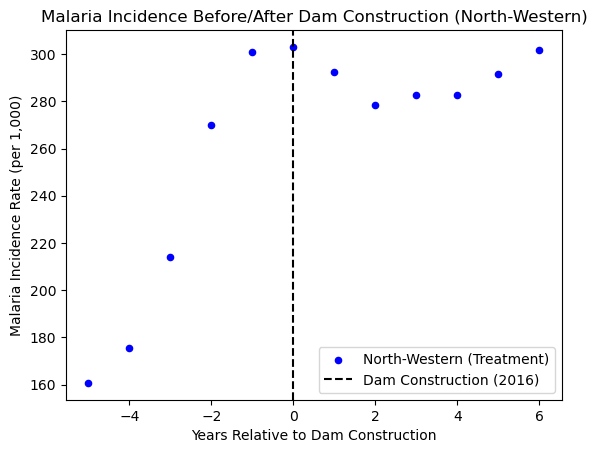

                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.955
Model:                            WLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     56.94
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           9.68e-06
Time:                        20:01:13   Log-Likelihood:                -44.875
No. Observations:                  12   AIC:                             97.75
Df Residuals:                       8   BIC:                             99.69
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        319.1333      9.026     35.

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<Figure size 800x600 with 0 Axes>

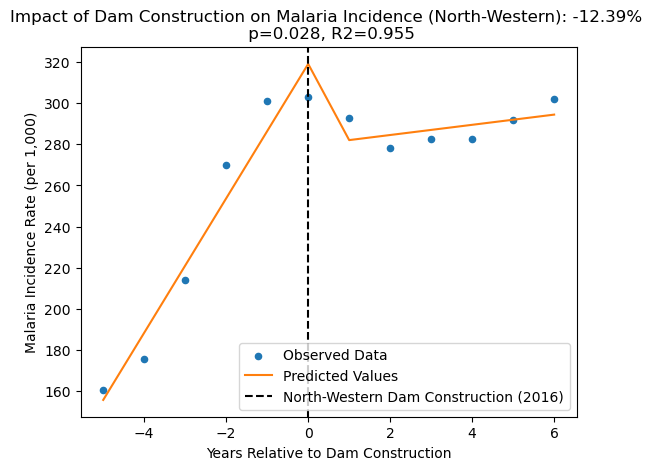

In [32]:
file_path = '/Users/MinxuanLuo/Desktop/filtered_data33.csv'
df = pd.read_csv(file_path)

df = df[df['Name'] == 'North-Western']

if df.empty:
    raise ValueError("Dataframe is empty after filtering for North-Western.")
if df['Year'].isnull().any() or df['Value'].isnull().any():
    raise ValueError("Year or Value column contains missing values.")
if df['Year'].nunique() < 2:
    raise ValueError("Year column has less than 2 unique values, insufficient for RDD.")

df["Year"] -= 2015

plt.figure(figsize=(8, 6))
df.plot.scatter(x="Year", y="Value", color="blue", label="North-Western (Treatment)")
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2016)")
plt.title("Malaria Incidence Before/After Dam Construction (North-Western)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.show()

rdd_df = df.assign(threshold=(df["Year"] > 0).astype(int))

try:
    model = smf.wls("Value ~ Year * threshold", rdd_df).fit()
except ValueError as e:
    print("Model fitting failed: ", e)
    raise

print(model.summary())

ate_pct = 100 * ((model.params["threshold"] + model.params["Intercept"]) / model.params["Intercept"] - 1)
print("Dam construction changes the malaria incidence rate by {}%".format(np.round(ate_pct, 2)))

plt.figure(figsize=(8, 6))
ax = df.plot.scatter(x="Year", y="Value", color="C0", label="Observed Data")
df.assign(predictions=model.fittedvalues).plot(x="Year", y="predictions", ax=ax, color="C1", label="Predicted Values")
plt.axvline(0, color="black", linestyle="--", label="North-Western Dam Construction (2016)")
plt.title(f"Impact of Dam Construction on Malaria Incidence (North-Western): {np.round(ate_pct, 2)}% \n p={np.round(model.pvalues['threshold'], 3)}, R2={np.round(model.rsquared, 3)}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.show()


                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.052
Model:                            WLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.5432
Date:                Thu, 16 Jan 2025   Prob (F-statistic):              0.478
Time:                        15:15:47   Log-Likelihood:                   -inf
No. Observations:                  12   AIC:                               inf
Df Residuals:                      10   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.0849      1.502     32.006   

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


<Figure size 800x600 with 0 Axes>

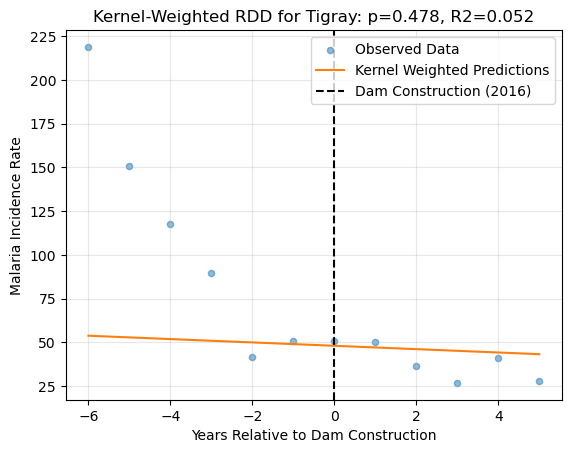

In [18]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

def kernel(R, c, h):
    indicator = (np.abs(R - c) <= h).astype(float)
    return indicator * (1 - np.abs(R - c) / h)

file_path = '/Users/MinxuanLuo/Desktop/filtered_data11.csv'
df = pd.read_csv(file_path)

df["years_to_dam"] = df["Year"] - 2016
df = df[df["Name"] == "Tigray"]
df = df.dropna(subset=["years_to_dam", "Value"])

bandwidth = 3
weights = kernel(df["years_to_dam"], c=0, h=bandwidth)

model_kernel = smf.wls("Value ~ years_to_dam * treated", data=df, weights=weights).fit()
print(model_kernel.summary())

plt.figure(figsize=(8, 6))
ax = df.plot.scatter(x="years_to_dam", y="Value", color="C0", alpha=0.5, label="Observed Data")
df["kernel_predictions"] = model_kernel.fittedvalues
df.plot(x="years_to_dam", y="kernel_predictions", color="C1", ax=ax, label="Kernel Weighted Predictions")
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2016)")
plt.title(f"Kernel-Weighted RDD: p={model_kernel.pvalues['treated']:.3f}, R2={model_kernel.rsquared:.3f}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.052
Model:                            WLS   Adj. R-squared:                 -0.043
Method:                 Least Squares   F-statistic:                    0.5432
Date:                Thu, 16 Jan 2025   Prob (F-statistic):              0.478
Time:                        18:26:20   Log-Likelihood:                   -inf
No. Observations:                  12   AIC:                               inf
Df Residuals:                      10   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       48.0849      1.502     32.006   

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


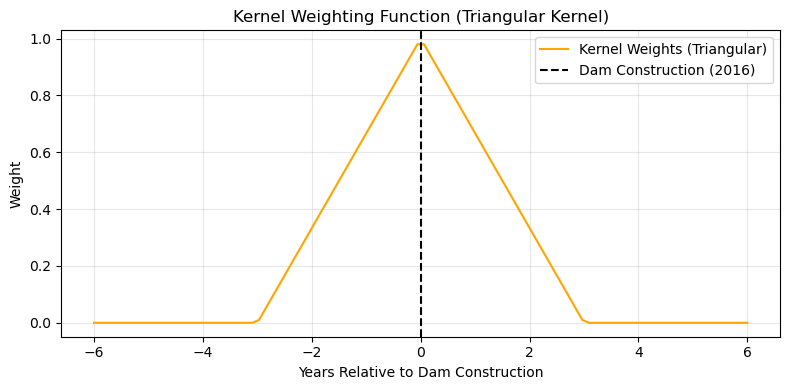

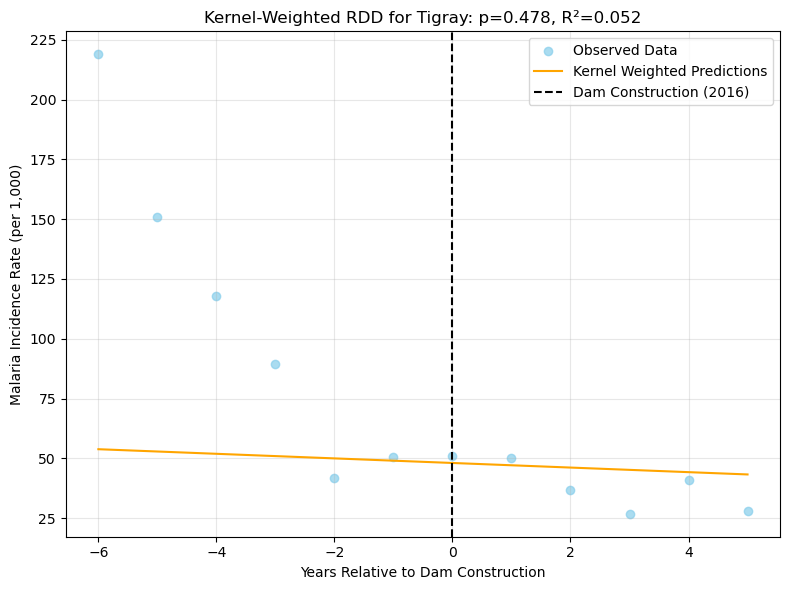

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

file_path = '/Users/MinxuanLuo/Desktop/filtered_data11.csv'
df = pd.read_csv(file_path)

df = df[df['Name'] == 'Tigray'].copy()

df['years_to_dam'] = df['Year'] - 2016

if df.empty:
    raise ValueError("No data for Tigray.")
if df['Value'].isnull().any() or df['years_to_dam'].isnull().any():
    raise ValueError("Missing values in the dataset.")

def kernel(x, c=0, h=3):
    weights = np.clip(1 - np.abs((x - c) / h), 0, None)
    return weights

bandwidth = 3

df['weights'] = kernel(df['years_to_dam'], c=0, h=bandwidth)

model_kernel = smf.wls("Value ~ years_to_dam", data=df, weights=df['weights']).fit()
print(model_kernel.summary())

plt.figure(figsize=(8, 4))
x_vals = np.linspace(-6, 6, 100)
weights = kernel(x_vals, c=0, h=bandwidth)

plt.plot(x_vals, weights, label='Kernel Weights (Triangular)', color='orange')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2016)')
plt.title("Kernel Weighting Function (Triangular Kernel)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Weight")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['years_to_dam'], df['Value'], alpha=0.7, label='Observed Data', color='skyblue')
plt.plot(df['years_to_dam'], model_kernel.predict(df['years_to_dam']), color='orange', label='Kernel Weighted Predictions')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2016)')
plt.title(f"Kernel-Weighted RDD for Tigray: p={model_kernel.pvalues['years_to_dam']:.3f}, R²={model_kernel.rsquared:.3f}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


     Name  Year       Value  years_to_dam
0  Tigray  2010  218.915589            -6
1  Tigray  2011  150.775489            -5
2  Tigray  2012  117.680588            -4
3  Tigray  2013   89.636329            -3
4  Tigray  2014   41.794347            -2
                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.893
Model:                            WLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     22.31
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000306
Time:                        18:41:09   Log-Likelihood:                   -inf
No. Observations:                  12   AIC:                               inf
Df Residuals:                       8   BIC:                               inf
Df Model:                           3                                         
Covariance Type:            nonrobust

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


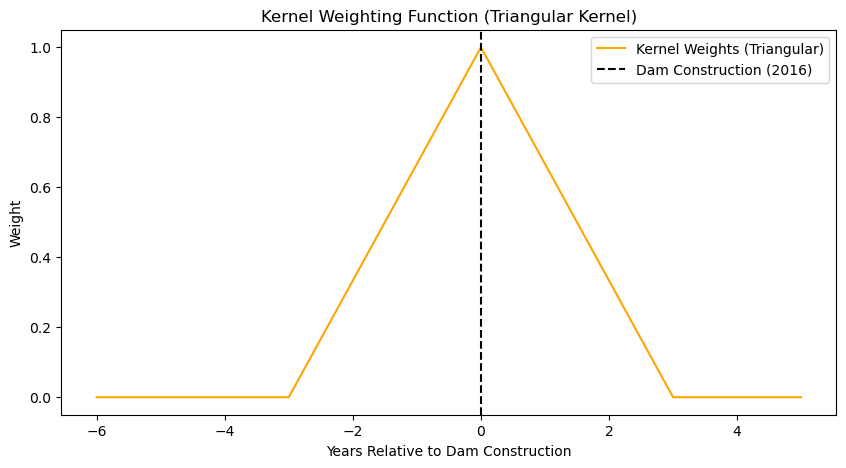

<Figure size 800x600 with 0 Axes>

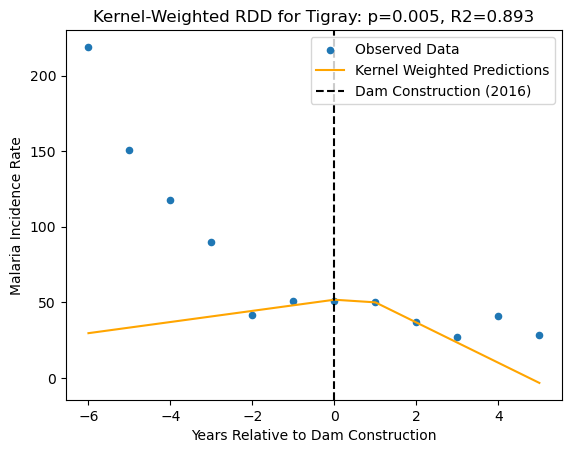

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

file_path = '/Users/MinxuanLuo/Desktop/filtered_data111.csv'
df = pd.read_csv(file_path)

df = df[df['Name'] == 'Tigray']

df['years_to_dam'] = df['Year'] - 2016

print(df.head())

def kernel(R, c, h):
    indicator = (np.abs(R - c) <= h).astype(float)
    return indicator * (1 - np.abs(R - c) / h)

bandwidth = 3

weights = kernel(df['years_to_dam'], c=0, h=bandwidth)

df['threshold'] = (df['years_to_dam'] > 0).astype(int)

model_kernel = smf.wls("Value ~ years_to_dam * threshold", data=df, weights=weights).fit()
print(model_kernel.summary())

plt.figure(figsize=(10, 5))
plt.plot(df['years_to_dam'], weights, color="orange", label="Kernel Weights (Triangular)")
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2016)")
plt.title("Kernel Weighting Function (Triangular Kernel)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Weight")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
ax = df.plot.scatter(x='years_to_dam', y='Value', color='C0', label='Observed Data')
df['predictions'] = model_kernel.fittedvalues
df.plot(x='years_to_dam', y='predictions', ax=ax, color='orange', label='Kernel Weighted Predictions')
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2016)")
plt.title(f"Kernel-Weighted RDD for Tigray: p={np.round(model_kernel.pvalues['threshold'], 3)}, R2={np.round(model_kernel.rsquared, 3)}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate")
plt.legend()
plt.show()


         Name  Year       Value  years_to_dam
0  Centre-Sud  2010  596.362266            -5
1  Centre-Sud  2011  593.217799            -4
2  Centre-Sud  2012  581.307965            -3
3  Centre-Sud  2013  525.637372            -2
4  Centre-Sud  2014  455.952745            -1
                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       1.000
Model:                            WLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.223e+06
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           8.30e-26
Time:                        18:43:14   Log-Likelihood:                   -inf
No. Observations:                  12   AIC:                               inf
Df Residuals:                       8   BIC:                               inf
Df Model:                           3                                         
Covariance Ty

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


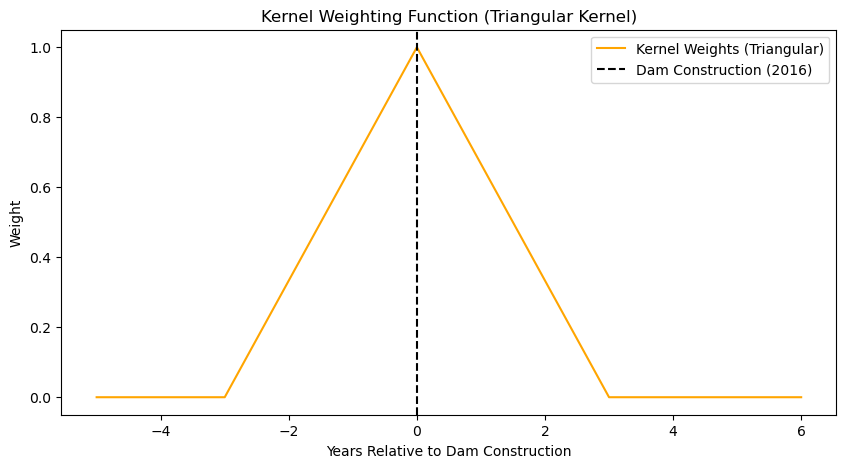

<Figure size 800x600 with 0 Axes>

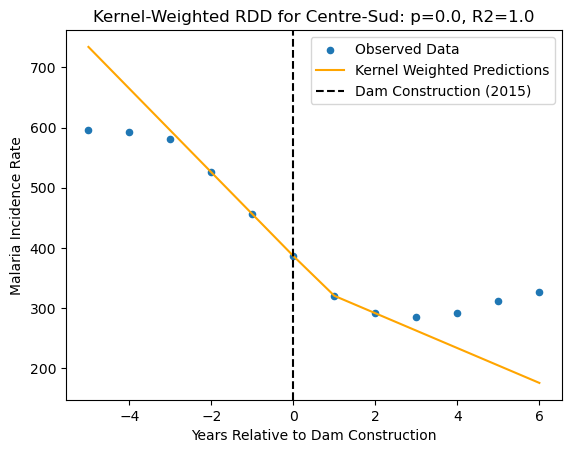

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

file_path = '/Users/MinxuanLuo/Desktop/filtered_data222.csv'
df = pd.read_csv(file_path)

df = df[df['Name'] == 'Centre-Sud']

df['years_to_dam'] = df['Year'] - 2015

print(df.head())

def kernel(R, c, h):
    indicator = (np.abs(R - c) <= h).astype(float)
    return indicator * (1 - np.abs(R - c) / h)

bandwidth = 3

weights = kernel(df['years_to_dam'], c=0, h=bandwidth)

df['threshold'] = (df['years_to_dam'] > 0).astype(int)

model_kernel = smf.wls("Value ~ years_to_dam * threshold", data=df, weights=weights).fit()
print(model_kernel.summary())

plt.figure(figsize=(10, 5))
plt.plot(df['years_to_dam'], weights, color="orange", label="Kernel Weights (Triangular)")
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2016)")
plt.title("Kernel Weighting Function (Triangular Kernel)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Weight")
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
ax = df.plot.scatter(x='years_to_dam', y='Value', color='C0', label='Observed Data')
df['predictions'] = model_kernel.fittedvalues
df.plot(x='years_to_dam', y='predictions', ax=ax, color='orange', label='Kernel Weighted Predictions')
plt.axvline(0, color="black", linestyle="--", label="Dam Construction (2015)")
plt.title(f"Kernel-Weighted RDD for Centre-Sud: p={np.round(model_kernel.pvalues['threshold'], 3)}, R2={np.round(model_kernel.rsquared, 3)}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate")
plt.legend()
plt.show()


                            WLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.789
Model:                            WLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     37.49
Date:                Thu, 16 Jan 2025   Prob (F-statistic):           0.000112
Time:                        18:46:59   Log-Likelihood:                   -inf
No. Observations:                  12   AIC:                               inf
Df Residuals:                      10   BIC:                               inf
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      291.5707      1.360    214.396   

/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Users/minxuanluo/anaconda3/lib/python3.11/site-packages/statsmodels/regression/linear_model.py:807: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


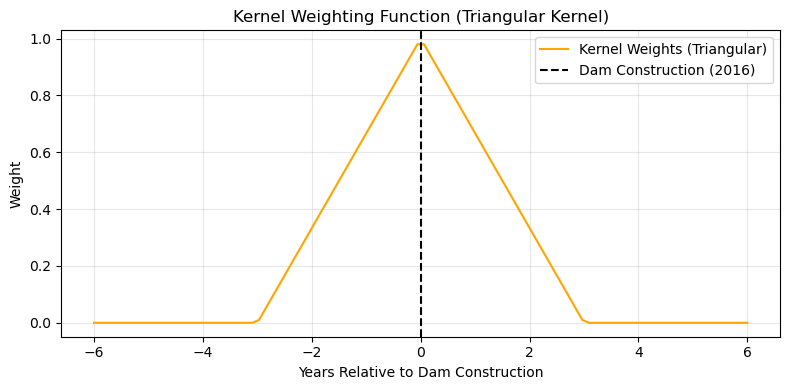

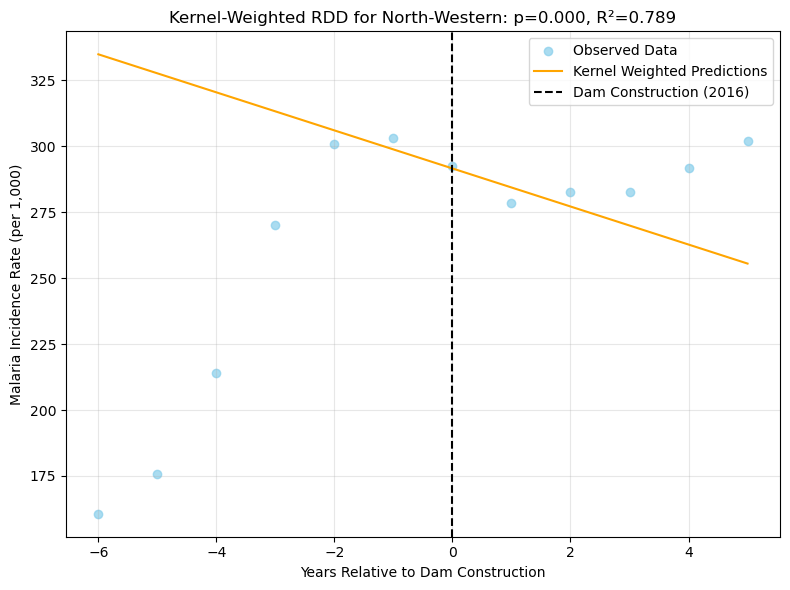

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

file_path = '/Users/MinxuanLuo/Desktop/filtered_data333.csv'
df = pd.read_csv(file_path)

df = df[df['Name'] == 'North-Western'].copy()

df['years_to_dam'] = df['Year'] - 2016

if df.empty:
    raise ValueError("No data for North-Western.")
if df['Value'].isnull().any() or df['years_to_dam'].isnull().any():
    raise ValueError("Missing values in the dataset.")

def kernel(x, c=0, h=3):
    weights = np.clip(1 - np.abs((x - c) / h), 0, None)
    return weights

bandwidth = 3

df['weights'] = kernel(df['years_to_dam'], c=0, h=bandwidth)

model_kernel = smf.wls("Value ~ years_to_dam", data=df, weights=df['weights']).fit()
print(model_kernel.summary())

plt.figure(figsize=(8, 4))
x_vals = np.linspace(-6, 6, 100)
weights = kernel(x_vals, c=0, h=bandwidth)

plt.plot(x_vals, weights, label='Kernel Weights (Triangular)', color='orange')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2016)')
plt.title("Kernel Weighting Function (Triangular Kernel)")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Weight")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(df['years_to_dam'], df['Value'], alpha=0.7, label='Observed Data', color='skyblue')
plt.plot(df['years_to_dam'], model_kernel.predict(df['years_to_dam']), color='orange', label='Kernel Weighted Predictions')
plt.axvline(0, color='black', linestyle='--', label='Dam Construction (2016)')
plt.title(f"Kernel-Weighted RDD for North-Western: p={model_kernel.pvalues['years_to_dam']:.3f}, R²={model_kernel.rsquared:.3f}")
plt.xlabel("Years Relative to Dam Construction")
plt.ylabel("Malaria Incidence Rate (per 1,000)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
